Employee turn-over (also known as "employee churn") is a costly problem for companies. The true cost of replacing an employee can often be quite large. A study by the Center for American Progress found that companies typically pay about one-fifth of an employee’s salary to replace that employee, and the cost can significantly increase if executives or highest-paid employees are to be replaced. In other words, the cost of replacing employees for most employers remains significant. This is due to the amount of time spent to interview and find a replacement, sign-on bonuses, and the loss of productivity for several months while the new employee gets accustomed to the new role.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

In [2]:
df=pd.read_csv("C:/Users/SREEHARI CR/data science/WA_Fn-UseC_-HR-Employee-Attrition.csv")

In [3]:
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [4]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [5]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [6]:
df.describe(include=object).T

,count,unique,top,freq
Attrition,1470,2,No,1233
BusinessTravel,1470,3,Travel_Rarely,1043
Department,1470,3,Research & Development,961
EducationField,1470,6,Life Sciences,606
Gender,1470,2,Male,882
JobRole,1470,9,Sales Executive,326
MaritalStatus,1470,3,Married,673
Over18,1470,1,Y,1470
OverTime,1470,2,No,1054


In [7]:
df.shape

(1470, 35)

In [8]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [10]:
#converting some binary variable to 0/1.

In [11]:
#list of variables to map
varlist =  ['Attrition','OverTime']

In [12]:
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})
df[varlist] = df[varlist].apply(binary_map)


In [13]:
pd.pandas.set_option("display.max_columns",None)
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,1,11,3,1,80,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,0,23,4,4,80,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,1,15,3,2,80,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,1,11,3,3,80,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,0,12,3,4,80,1,6,3,3,2,2,2,2


In [14]:
label=LabelEncoder()
BusinessTravel=label.fit_transform(df['BusinessTravel'])
Department=label.fit_transform(df['Department'])
EducationField=label.fit_transform(df['EducationField'])
Gender=label.fit_transform(df['Gender'])
JobRole=label.fit_transform(df['JobRole'])
MaritalStatus=label.fit_transform(df['MaritalStatus'])
Over18=label.fit_transform(df['Over18'])
df['BusinessTravel']=BusinessTravel
df['Department']=Department
df['EducationField']=EducationField
df['Gender']=Gender
df['JobRole']=JobRole
df['MaritalStatus']=MaritalStatus
df['Over18']=Over18

In [15]:
pd.pandas.set_option("display.max_columns",None)
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,1,1,2,0,94,3,2,7,4,2,5993,19479,8,0,1,11,3,1,80,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,1,2,3,1,61,2,2,6,2,1,5130,24907,1,0,0,23,4,4,80,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,1,4,4,1,92,2,1,2,3,2,2090,2396,6,0,1,15,3,2,80,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,1,5,4,0,56,3,1,6,3,1,2909,23159,1,0,1,11,3,3,80,0,8,3,3,8,7,3,0
4,27,0,2,591,1,2,1,3,1,7,1,1,40,3,1,2,2,1,3468,16632,9,0,0,12,3,4,80,1,6,3,3,2,2,2,2


In [16]:
X=df.drop(["Attrition"],axis=1)
X.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,2,1102,2,1,2,1,1,1,2,0,94,3,2,7,4,2,5993,19479,8,0,1,11,3,1,80,0,8,0,1,6,4,0,5
1,49,1,279,1,8,1,1,1,2,3,1,61,2,2,6,2,1,5130,24907,1,0,0,23,4,4,80,1,10,3,3,10,7,1,7
2,37,2,1373,1,2,2,4,1,4,4,1,92,2,1,2,3,2,2090,2396,6,0,1,15,3,2,80,0,7,3,3,0,0,0,0
3,33,1,1392,1,3,4,1,1,5,4,0,56,3,1,6,3,1,2909,23159,1,0,1,11,3,3,80,0,8,3,3,8,7,3,0
4,27,2,591,1,2,1,3,1,7,1,1,40,3,1,2,2,1,3468,16632,9,0,0,12,3,4,80,1,6,3,3,2,2,2,2


In [17]:
y=df['Attrition']
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Attrition, dtype: int64

In [18]:
sc=StandardScaler()
x=sc.fit_transform(X)


In [19]:
#train_test_split

In [20]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, train_size=0.7, test_size=0.3, random_state=100)

In [21]:
xtrain

array([[ 0.99385966,  0.59004834, -0.68543635, ...,  2.42158466,
         3.97731027,  0.80654148],
       [ 1.54136892,  0.59004834,  1.49369451, ..., -0.61549158,
        -0.67914568, -0.31487349],
       [-0.86767181,  0.59004834, -0.82674518, ..., -0.61549158,
        -0.36871529, -0.03451975],
       ...,
       [ 0.55585225,  0.59004834, -0.64081251, ..., -0.61549158,
        -0.36871529, -1.15593471],
       [ 0.99385966,  0.59004834,  0.35330748, ..., -0.61549158,
        -0.67914568, -0.59522723],
       [-0.42966441, -0.91319439,  0.06077342, ...,  0.76499762,
         0.25214551,  1.08689522]])

In [22]:
#using model logistictregression

In [23]:
model1=LogisticRegression()
model1.fit(xtrain,ytrain)

LogisticRegression()

In [24]:
ypred1=model1.predict(xtest)

In [25]:
ypred1

array([0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [26]:
cm1=confusion_matrix(ytest,ypred1)

In [27]:
cm1

array([[353,  18],
       [ 40,  30]], dtype=int64)

In [28]:
ac1=accuracy_score(ytest,ypred1)

In [29]:
ac1

0.8684807256235828

In [30]:
cr1=classification_report(ytest,ypred1)

In [31]:
cr1

'              precision    recall  f1-score   support\n\n           0       0.90      0.95      0.92       371\n           1       0.62      0.43      0.51        70\n\n    accuracy                           0.87       441\n   macro avg       0.76      0.69      0.72       441\nweighted avg       0.85      0.87      0.86       441\n'

In [32]:
from sklearn.tree import DecisionTreeClassifier

In [33]:
model2=DecisionTreeClassifier(criterion="gini")

In [34]:
model2.fit(xtrain,ytrain)

DecisionTreeClassifier()

In [35]:
ypred2=model2.predict(xtest)

In [36]:
cm2=confusion_matrix(ytest,ypred2)

In [37]:
cm2

array([[316,  55],
       [ 38,  32]], dtype=int64)

In [38]:
ac2=accuracy_score(ytest,ypred2)

In [39]:
ac2

0.7891156462585034

In [40]:
classification_report(ytest,ypred2)

'              precision    recall  f1-score   support\n\n           0       0.89      0.85      0.87       371\n           1       0.37      0.46      0.41        70\n\n    accuracy                           0.79       441\n   macro avg       0.63      0.65      0.64       441\nweighted avg       0.81      0.79      0.80       441\n'

In [41]:
from sklearn.ensemble import RandomForestClassifier

In [42]:
model3=RandomForestClassifier(n_estimators=5,criterion='entropy')

In [43]:
model3.fit(xtrain,ytrain)

RandomForestClassifier(criterion='entropy', n_estimators=5)

In [44]:
ypred3=model3.predict(xtest)

In [45]:
cm3=confusion_matrix(ytest,ypred3)

In [46]:
cm3

array([[354,  17],
       [ 57,  13]], dtype=int64)

In [47]:
ac3=accuracy_score(ytest,ypred3)

In [48]:
ac3

0.8321995464852607

In [49]:
classification_report(ytest,ypred3)

'              precision    recall  f1-score   support\n\n           0       0.86      0.95      0.91       371\n           1       0.43      0.19      0.26        70\n\n    accuracy                           0.83       441\n   macro avg       0.65      0.57      0.58       441\nweighted avg       0.79      0.83      0.80       441\n'

In [50]:
from sklearn.svm import SVC

In [51]:
model4=SVC(kernel="linear",random_state=0)

In [52]:
model4.fit(xtrain,ytrain)

SVC(kernel='linear', random_state=0)

In [53]:
ypred4=model4.predict(xtest)

In [54]:
cm4=confusion_matrix(ytest,ypred4)
cm4

array([[358,  13],
       [ 43,  27]], dtype=int64)

In [55]:
ac4=accuracy_score(ytest,ypred4)
ac4

0.873015873015873

In [56]:
classification_report(ytest,ypred4)

'              precision    recall  f1-score   support\n\n           0       0.89      0.96      0.93       371\n           1       0.68      0.39      0.49        70\n\n    accuracy                           0.87       441\n   macro avg       0.78      0.68      0.71       441\nweighted avg       0.86      0.87      0.86       441\n'

In [57]:
model5=SVC(kernel='rbf',random_state=0)

In [58]:
model5.fit(xtrain,ytrain)

SVC(random_state=0)

In [59]:
ypred5=model5.predict(xtest)

In [60]:
confusion_matrix(ytest,ypred5)

array([[363,   8],
       [ 52,  18]], dtype=int64)

In [61]:
accuracy_score(ytest,ypred5)

0.8639455782312925

In [62]:
classification_report(ytest,ypred5)

'              precision    recall  f1-score   support\n\n           0       0.87      0.98      0.92       371\n           1       0.69      0.26      0.37        70\n\n    accuracy                           0.86       441\n   macro avg       0.78      0.62      0.65       441\nweighted avg       0.85      0.86      0.84       441\n'

In [63]:
df1=pd.read_csv("C:/Users/SREEHARI CR/data science/WA_Fn-UseC_-HR-Employee-Attrition.csv")

In [64]:
df1

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,3,Male,41,4,2,Laboratory Technician,4,Married,2571,12290,4,Y,No,17,3,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,4,Male,42,2,3,Healthcare Representative,1,Married,9991,21457,4,Y,No,15,3,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,2,Male,87,4,2,Manufacturing Director,2,Married,6142,5174,1,Y,Yes,20,4,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,4,Male,63,2,2,Sales Executive,2,Married,5390,13243,2,Y,No,14,3,4,80,0,17,3,2,9,6,0,8


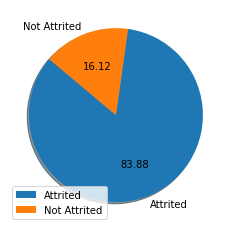

<AxesSubplot:>

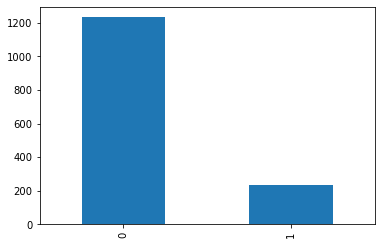

In [65]:
target=df1.iloc[:,1].value_counts()
plt.pie(target,labels=["Attrited","Not Attrited"],autopct = "%0.2f",shadow = True,startangle = 140)
plt.title = ("Attrition")
plt.legend(loc = "lower left")
plt.show()
df['Attrition'].value_counts().plot.bar()

In [66]:
#plot a pie chart depends on the gender

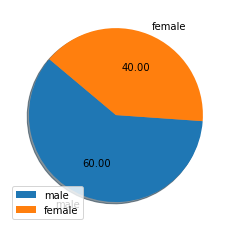

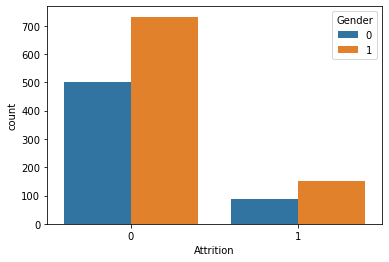

In [98]:
target=df1.iloc[:,11].value_counts()
plt.pie(target,labels=["male","female"],autopct = "%0.2f",shadow = True,startangle = 140)
plt.title = ("GENDER")
plt.legend(loc = "lower left")
plt.show()
#df['Gender'].value_counts().plot.bar()
sns.countplot(x='Attrition', hue='Gender', data=df);

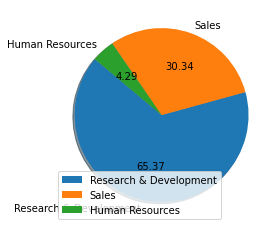

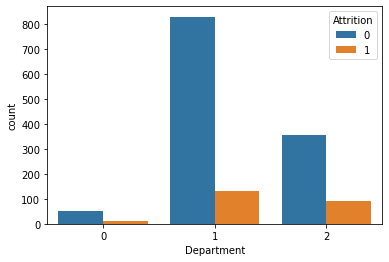

In [86]:
target=df1.iloc[:,4].value_counts()
plt.pie(target,labels=["Research & Development","Sales","Human Resources"],autopct = "%0.2f",shadow = True,startangle = 140)
plt.title = ("Department")
plt.legend(loc = "lower left")
plt.show()
#df['Department'].value_counts().plot.bar()
sns.countplot(x='Department', hue='Attrition', data=df);

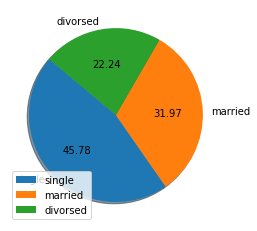

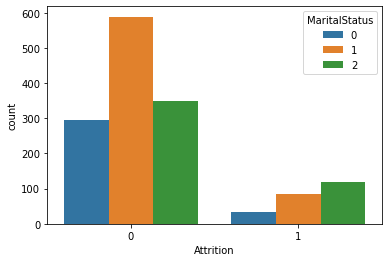

In [88]:
target=df1.iloc[:,17].value_counts()
plt.pie(target,labels=["single","married","divorsed"],autopct = "%0.2f",shadow = True,startangle = 140)
plt.title = ("MaritalStatus")
plt.legend(loc = "lower left")
plt.show()
sns.countplot(x='Attrition', hue= 'MaritalStatus', data = df)
plt.show()

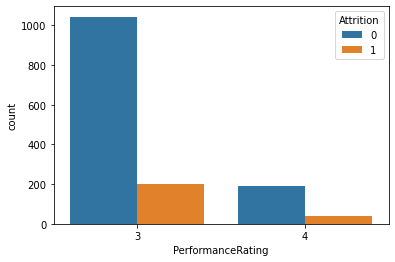

In [96]:

sns.countplot(x='PerformanceRating', hue= 'Attrition', data = df)
plt.show()

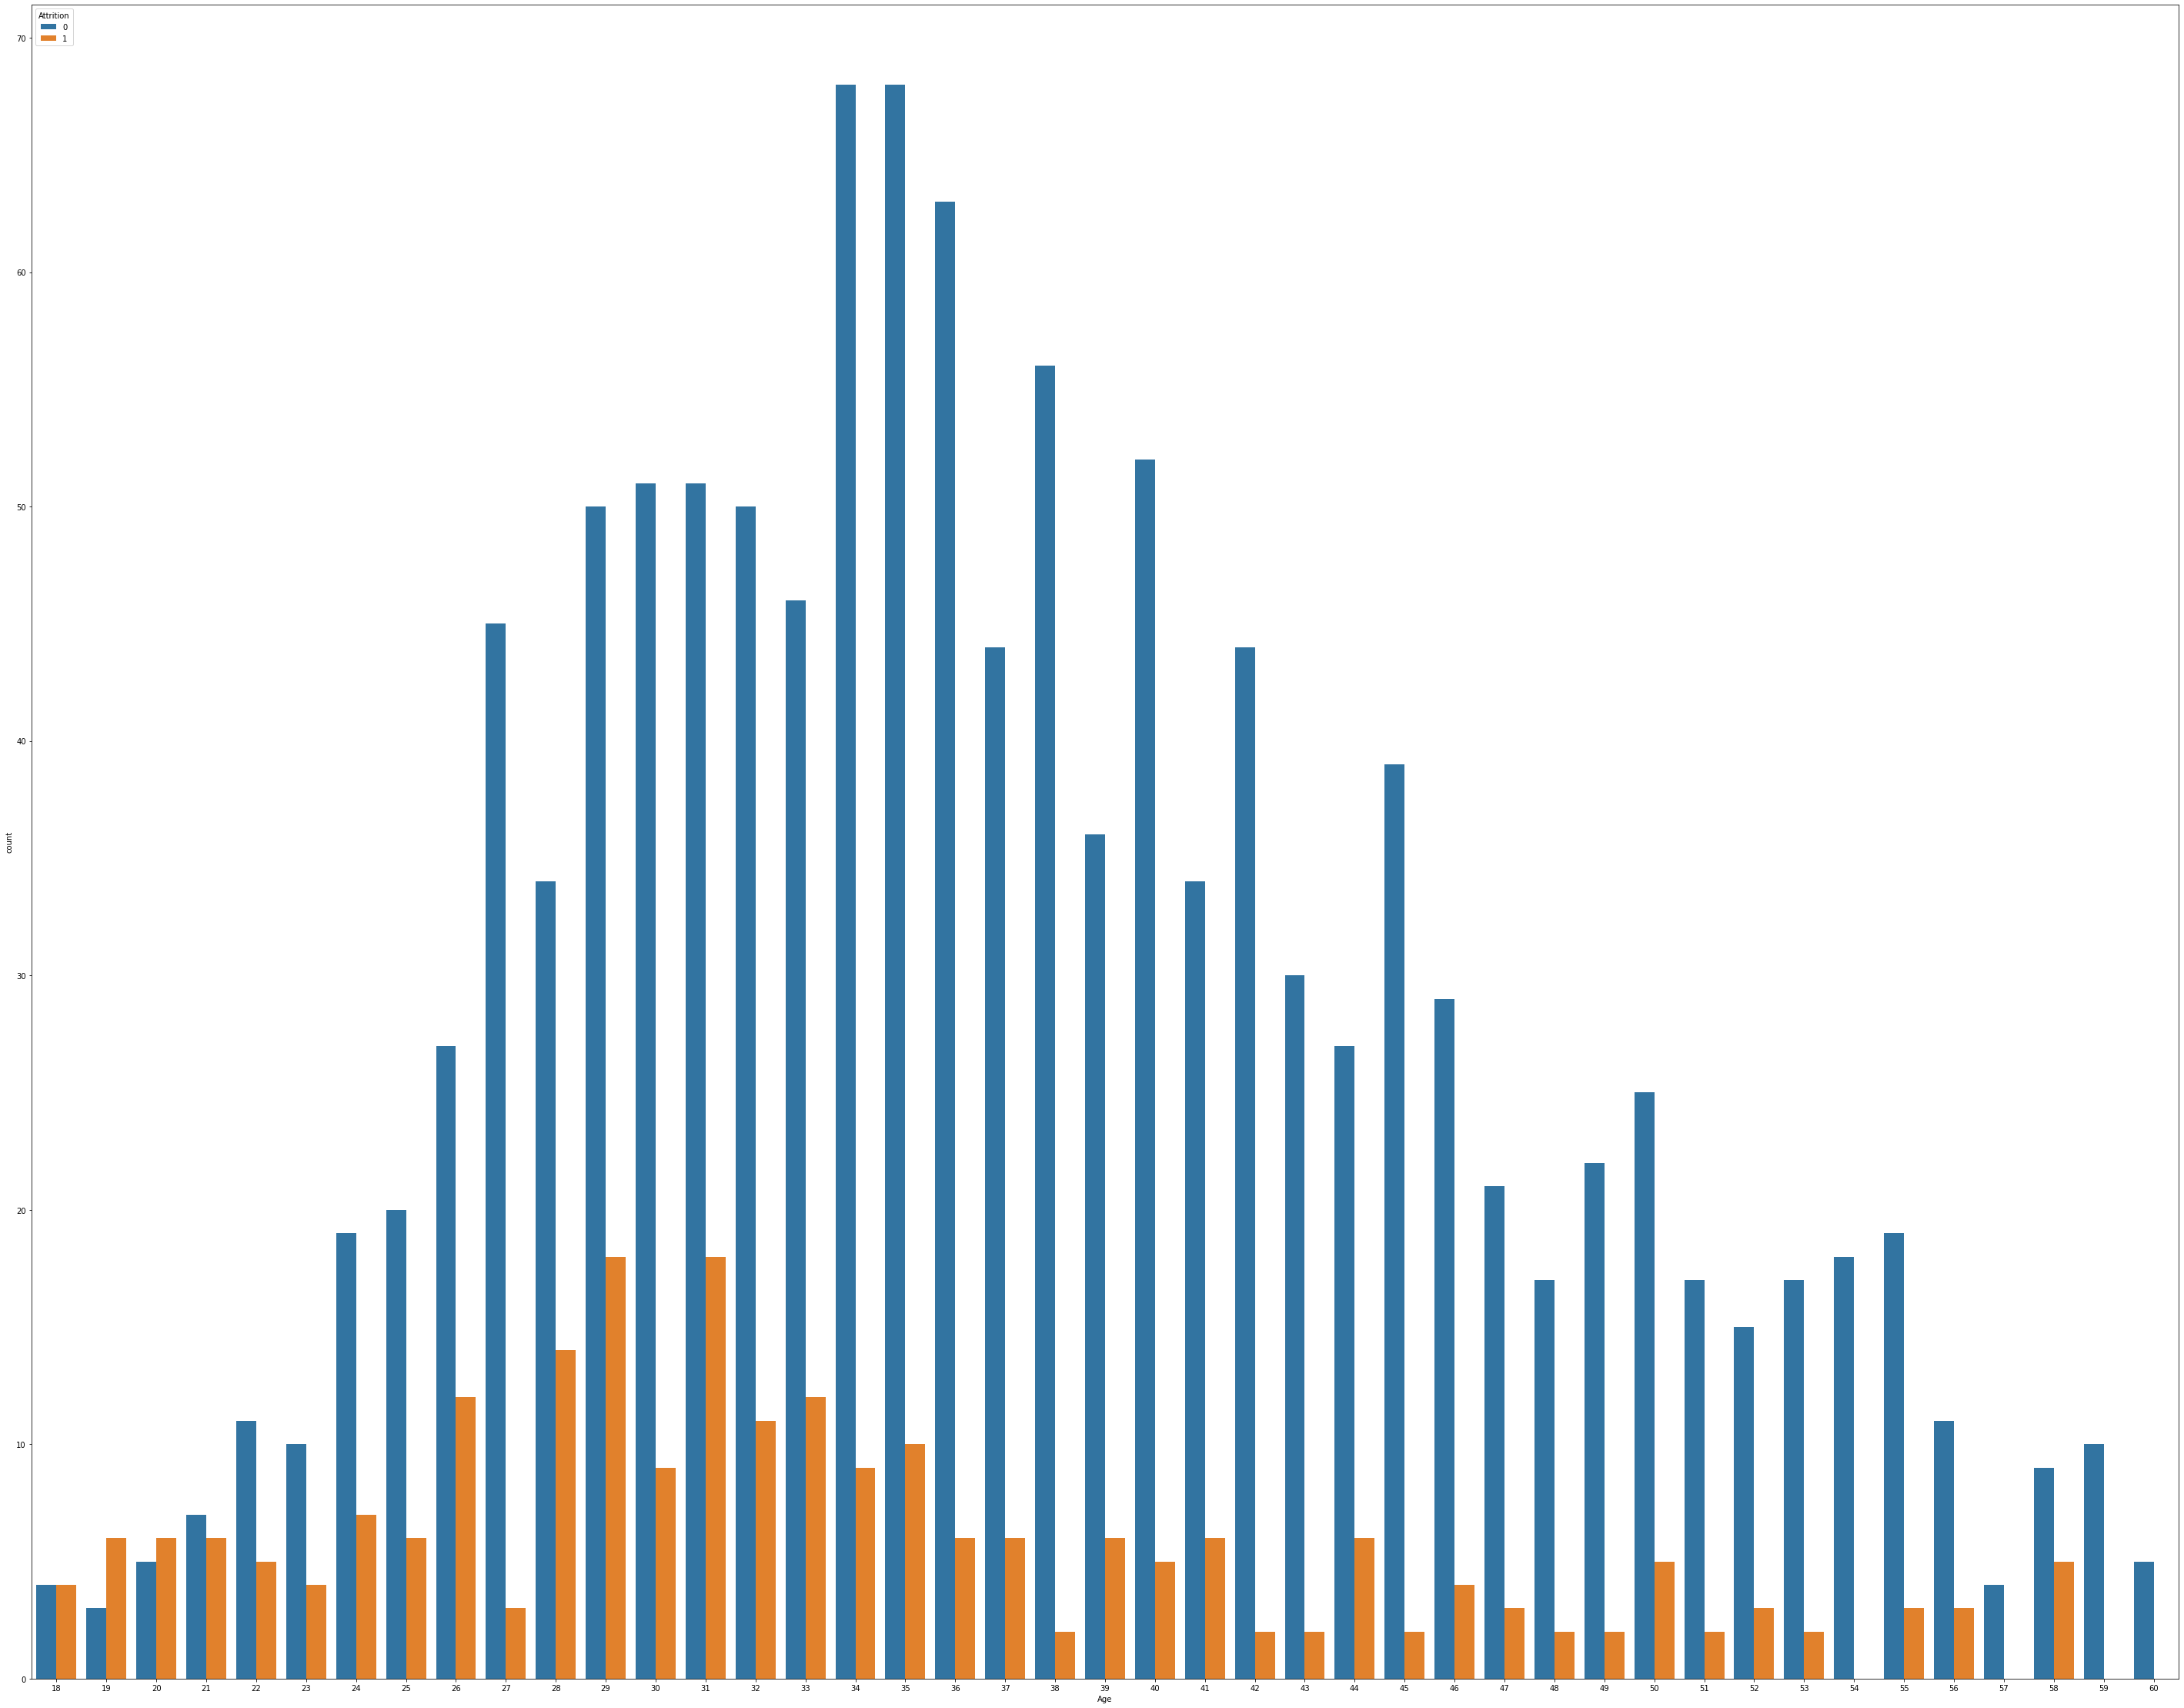

In [78]:
plt.figure(figsize=(50,40))
sns.countplot(x='Age', hue='Attrition', data=df);

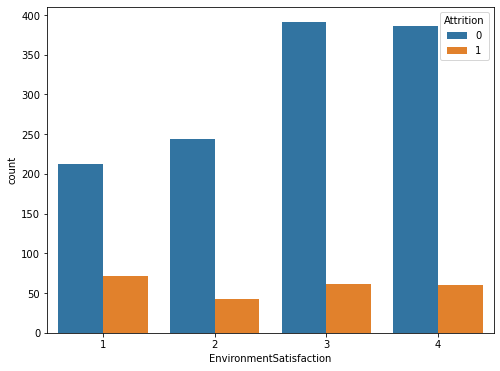

In [77]:
plt.figure(figsize=(8,6))
sns.countplot(x='EnvironmentSatisfaction', hue='Attrition', data=df);

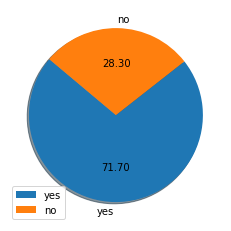

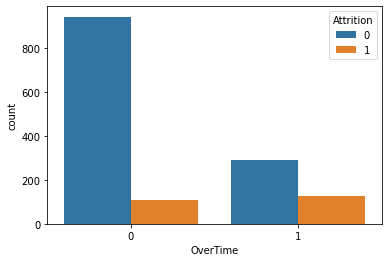

In [100]:
target=df1.iloc[:,22].value_counts()
plt.pie(target,labels=["yes","no"],autopct = "%0.2f",shadow = True,startangle = 140)
plt.title = ("MaritalStatus")
plt.legend(loc = "lower left")
plt.show()
sns.countplot(x='OverTime', hue='Attrition', data=df);

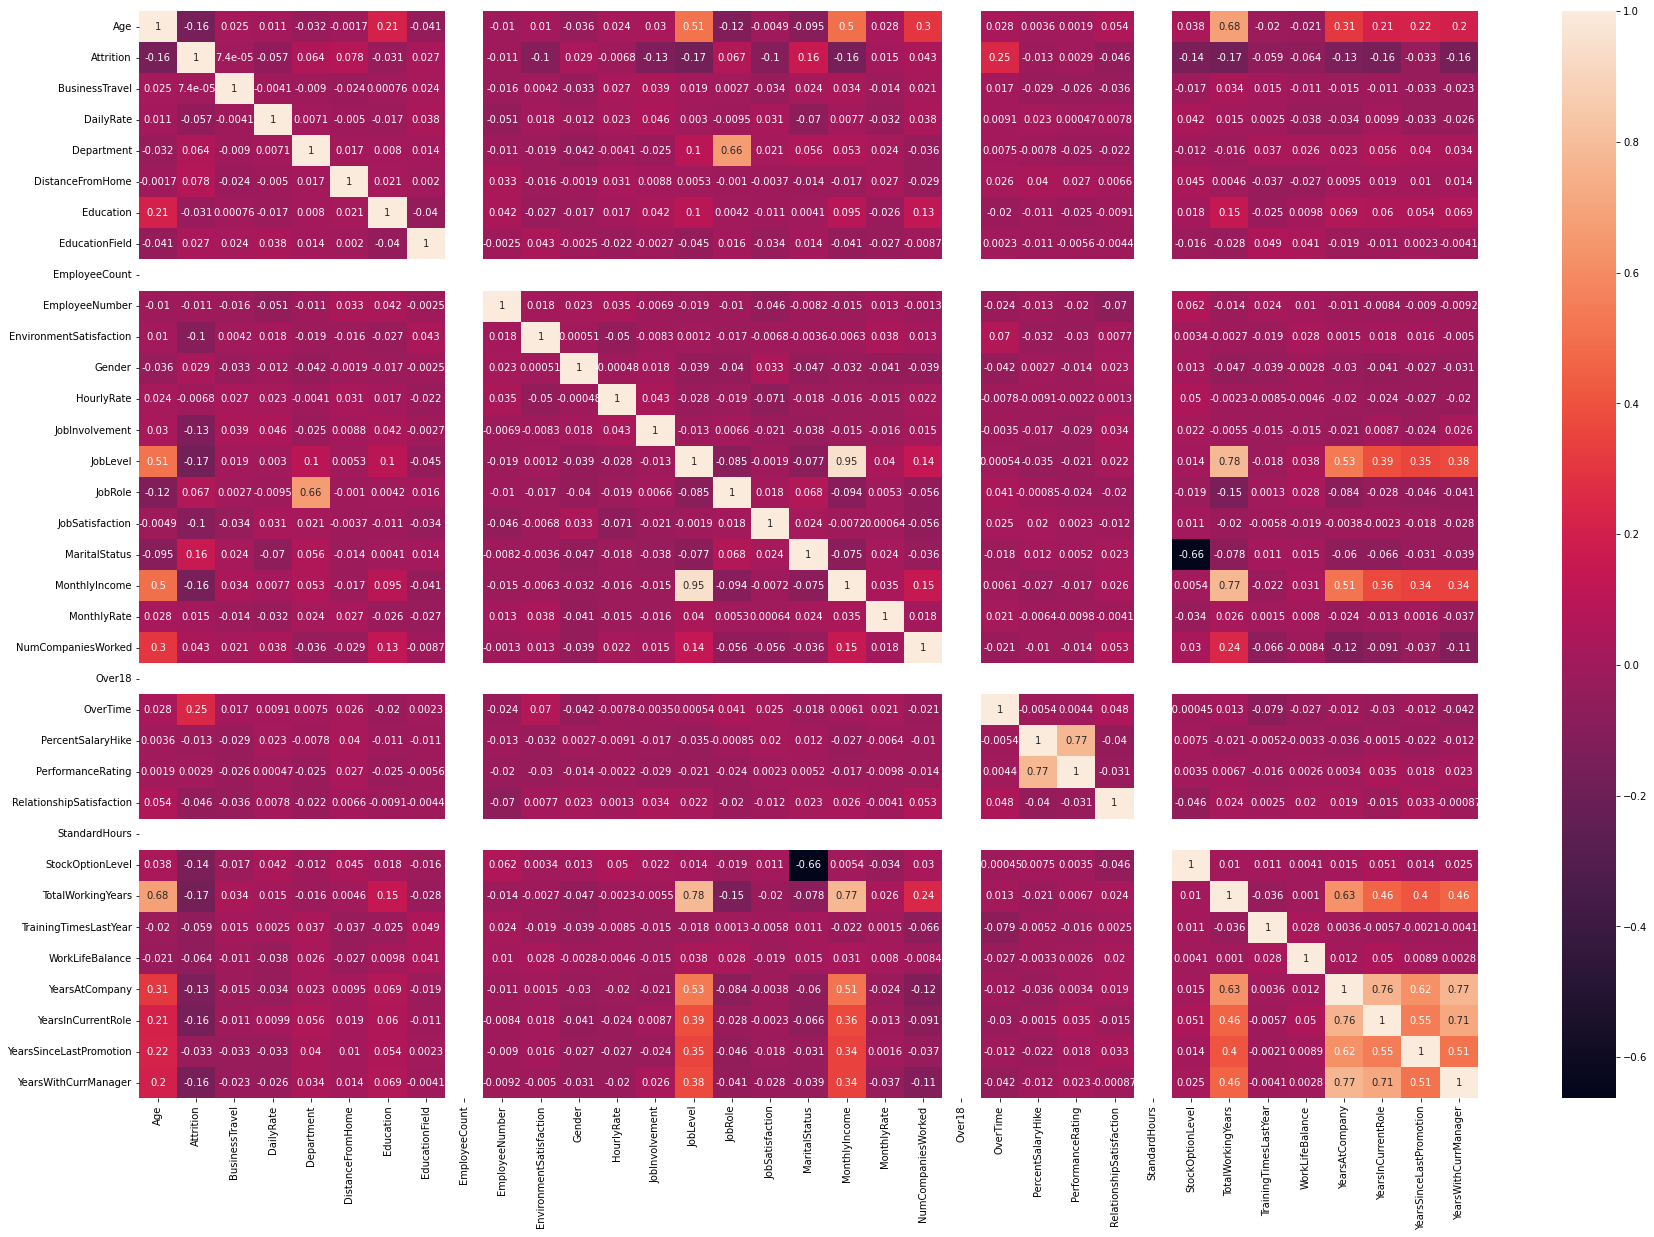

In [70]:
plt.figure(figsize = (30,20))        # Size of the figure
sns.heatmap(df.corr(),annot = True)
plt.show()

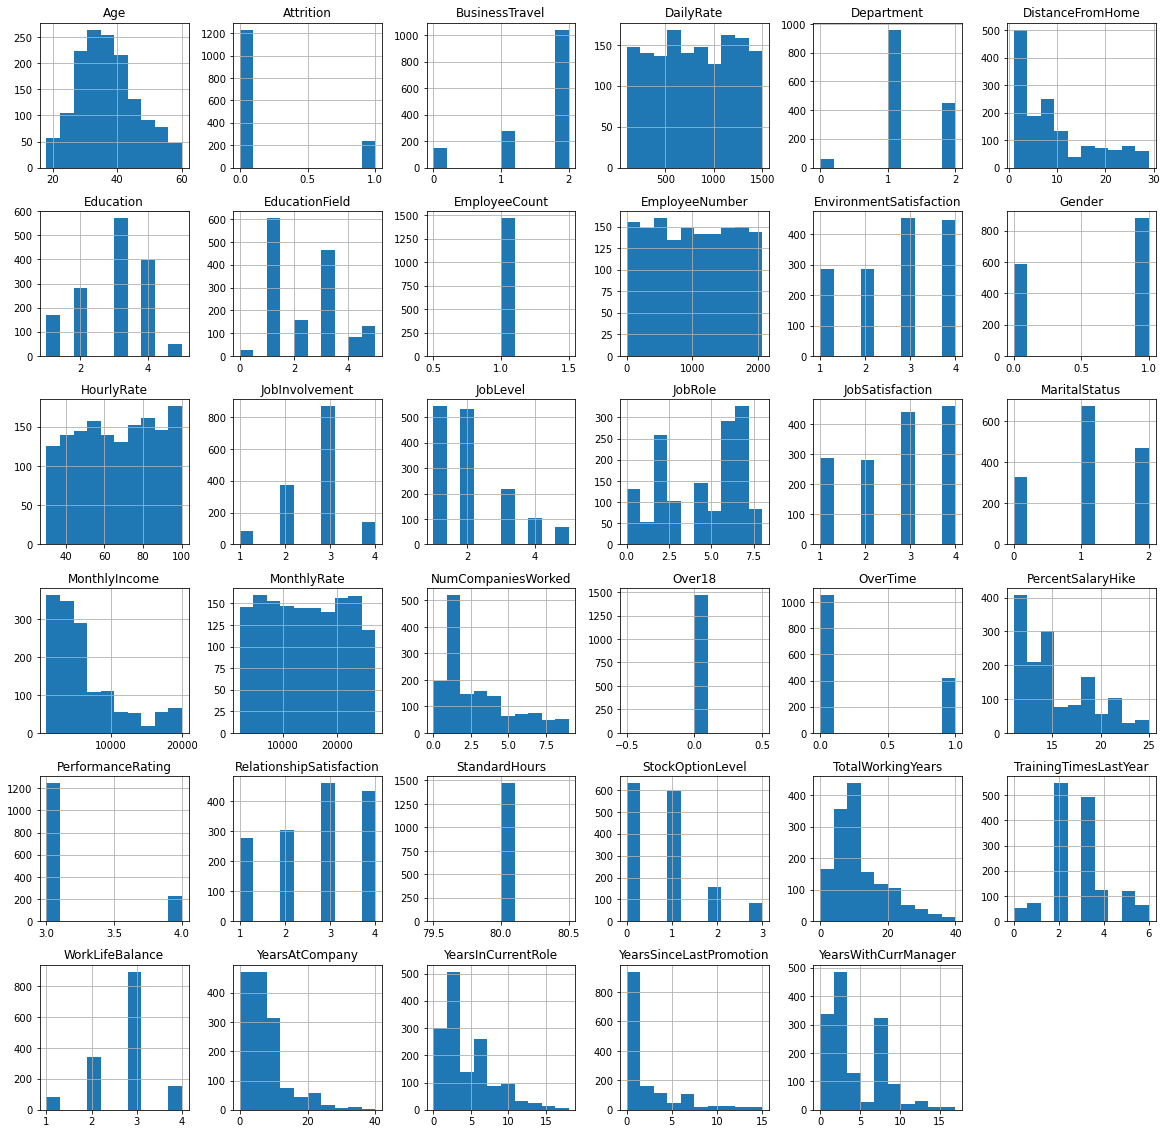

In [91]:
# Plotting the numerical variables in histograms to see their distribution.
df.hist(figsize=(20,20))
plt.show()

In [ ]:
# Plotting the categorical variables to see their distribution
fig=plt.figure(figsize=(20,50))
plt.style.use('seaborn-colorblind')
for i in range(len((df.select_dtypes(include='object')).columns)):
    fig.add_subplot(11,3,i+1)
    df.select_dtypes(include='object').iloc[:,i].value_counts().plot(kind="pie",  subplots=True,autopct='%1.1f%%',
        shadow=True, startangle=180)

NameError: name 'plot_pie' is not defined